In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series

In [3]:
ds = pd.read_excel('Book1_latvju_muzika_jy.xlsx')
ds.head()

,"ANALĪZES VIENĪBAS_TĒLAINĀ VALODA_ALMANAHS ""LATVJU MŪZIKA"" 1968 –",DZĪVĪBA/SĀKUMS,NĀVE/BEIGAS,RAKSTS,ATMIŅA,BALSS,CELTNE,CEĻŠ,DABA,DARBS,...,hard_to_say,na,GADS,LAIKRAKSTS,ŽANRS,PUBLIKĀCIJA,AUTORS,MĒRĶJOMA,AVOTJOMA,VĀRDŠĶIRA
0,"Viņam patika aplikties gultā siltām pudelēm, p...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1968,“Latvju Mūzika” nr. 1,portretsleja,JĀNIS ZĀLĪTIS,Jēkabs Poruks,NaN,NaN,NaN
1,"Jaunības dienās viņam bijušas vājas krūtis, be...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1968,“Latvju Mūzika” nr. 1,portretsleja,JĀNIS ZĀLĪTIS,Jēkabs Poruks,NaN,NaN,NaN
2,Dziedniecības jautājumos viņam ticība ar māņti...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1968,“Latvju Mūzika” nr. 1,portretsleja,JĀNIS ZĀLĪTIS,Jēkabs Poruks,NaN,NaN,NaN
3,"Tikai izejot no vecpuiša kārtas, šīs jaukās na...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1968,“Latvju Mūzika” nr. 1,portretsleja,JĀNIS ZĀLĪTIS,Jēkabs Poruks,NaN,NaN,NaN
4,Cik reižu draugi vājuma brīžos neizsēdējās pie...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1968,“Latvju Mūzika” nr. 1,portretsleja,JĀNIS ZĀLĪTIS,Jēkabs Poruks,NaN,NaN,NaN


In [4]:
ds.columns

Index(['ANALĪZES VIENĪBAS_TĒLAINĀ VALODA_ALMANAHS "LATVJU MŪZIKA" 1968 –',
       'DZĪVĪBA/SĀKUMS', 'NĀVE/BEIGAS', 'RAKSTS', 'ATMIŅA', 'BALSS', 'CELTNE',
       'CEĻŠ', 'DABA', 'DARBS', 'DEFORMĀCIJA', 'EMOCIJAS', 'FIZIKA',
       'JAUNS/VECS', 'LIELS/MAZS', 'DAUDZ/MAZ', 'KARŠ', 'KOPŠANA', 'ĶERMENIS',
       'LAIKS', 'MĒRĪJUMI', 'MET/POĒTISKA', 'MET/MŪZIKA', 'PAAUDZES',
       'POLITIKA', 'PROCESS', 'PROFESIJAS', 'PS. ĪPAŠĪBAS', 'RELIĢIJA',
       'RITUĀLS', 'ROBEŽAS', 'SAITES', 'SEN/DZIRDE', 'SEN/GARŠA', 'SEN/REDZE',
       'SEN/SMARŽA', 'SEN/TAUSTE', 'SKAŅA/KLUSUMS', 'SLĒPŠANĀS',
       'SOC/HIERARHIJA', 'SOC/KOPIENA', 'SOC/VARA', 'SPIRITUĀLĀS', 'STATUSS',
       'STIPRUMS/SPĒKS', 'TEHNOLOĢIJA', 'TEKSTILS', 'TELPA', 'TĪRĪBA',
       'TRADĪCIJAS', 'TVERTNE', 'VALSTS/TAUTA', 'VESELĪBA/SLIMĪBA', 'VĒRTĪBA',
       'VIRZIENS', 'IDIOMA', 'FRAZEOLOĢISMS', 'PERSONIFIKĀCIJA', 'REFERENCE',
       'EIFĒMISMS', 'SVEŠVALODA', 'IRONIJA', 'METONĪMIJA', 'DIRIĢENTS',
       'DZIESMU SVĒTKI', 'ANSAMBLI

In [29]:
kategorijas = ds[['DZĪVĪBA/SĀKUMS', 'NĀVE/BEIGAS', 'RAKSTS', 'ATMIŅA', 'BALSS', 'CELTNE',
       'CEĻŠ', 'DABA', 'DARBS', 'DEFORMĀCIJA', 'EMOCIJAS', 'FIZIKA',
       'JAUNS/VECS', 'LIELS/MAZS', 'DAUDZ/MAZ', 'KARŠ', 'KOPŠANA', 'ĶERMENIS',
       'LAIKS', 'MĒRĪJUMI', 'MET/POĒTISKA', 'MET/MŪZIKA', 'PAAUDZES',
       'POLITIKA', 'PROCESS', 'PROFESIJAS', 'PS. ĪPAŠĪBAS', 'RELIĢIJA',
       'RITUĀLS', 'ROBEŽAS', 'SAITES', 'SEN/DZIRDE', 'SEN/GARŠA', 'SEN/REDZE',
       'SEN/SMARŽA', 'SEN/TAUSTE', 'SKAŅA/KLUSUMS', 'SLĒPŠANĀS',
       'SOC/HIERARHIJA', 'SOC/KOPIENA', 'SOC/VARA', 'SPIRITUĀLĀS', 'STATUSS',
       'STIPRUMS/SPĒKS', 'TEHNOLOĢIJA', 'TEKSTILS', 'TELPA', 'TĪRĪBA',
       'TRADĪCIJAS', 'TVERTNE', 'VALSTS/TAUTA', 'VESELĪBA/SLIMĪBA', 'VĒRTĪBA',
       'VIRZIENS', 'IDIOMA', 'FRAZEOLOĢISMS', 'PERSONIFIKĀCIJA', 'REFERENCE',
       'EIFĒMISMS', 'SVEŠVALODA', 'IRONIJA', 'METONĪMIJA', 'DIRIĢENTS',
       'DZIESMU SVĒTKI', 'ANSAMBLIS', 'KORIS', 'KLAUSĪTĀJS', 'MŪZIĶIS',
       'KRITIĶIS', 'KOMPONISTS', 'MŪZIKA', 'POSITIVE', 'NEGATIVE',
       'hard_to_say', 'na']]

In [6]:
kategorijas.head()

,DZĪVĪBA/SĀKUMS,NĀVE/BEIGAS,RAKSTS,ATMIŅA,BALSS,CELTNE,CEĻŠ,DABA,DARBS,DEFORMĀCIJA,...,KORIS,KLAUSĪTĀJS,MŪZIĶIS,KRITIĶIS,KOMPONISTS,MŪZIKA,POSITIVE,NEGATIVE,hard_to_say,na
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
corr = kategorijas.corr()

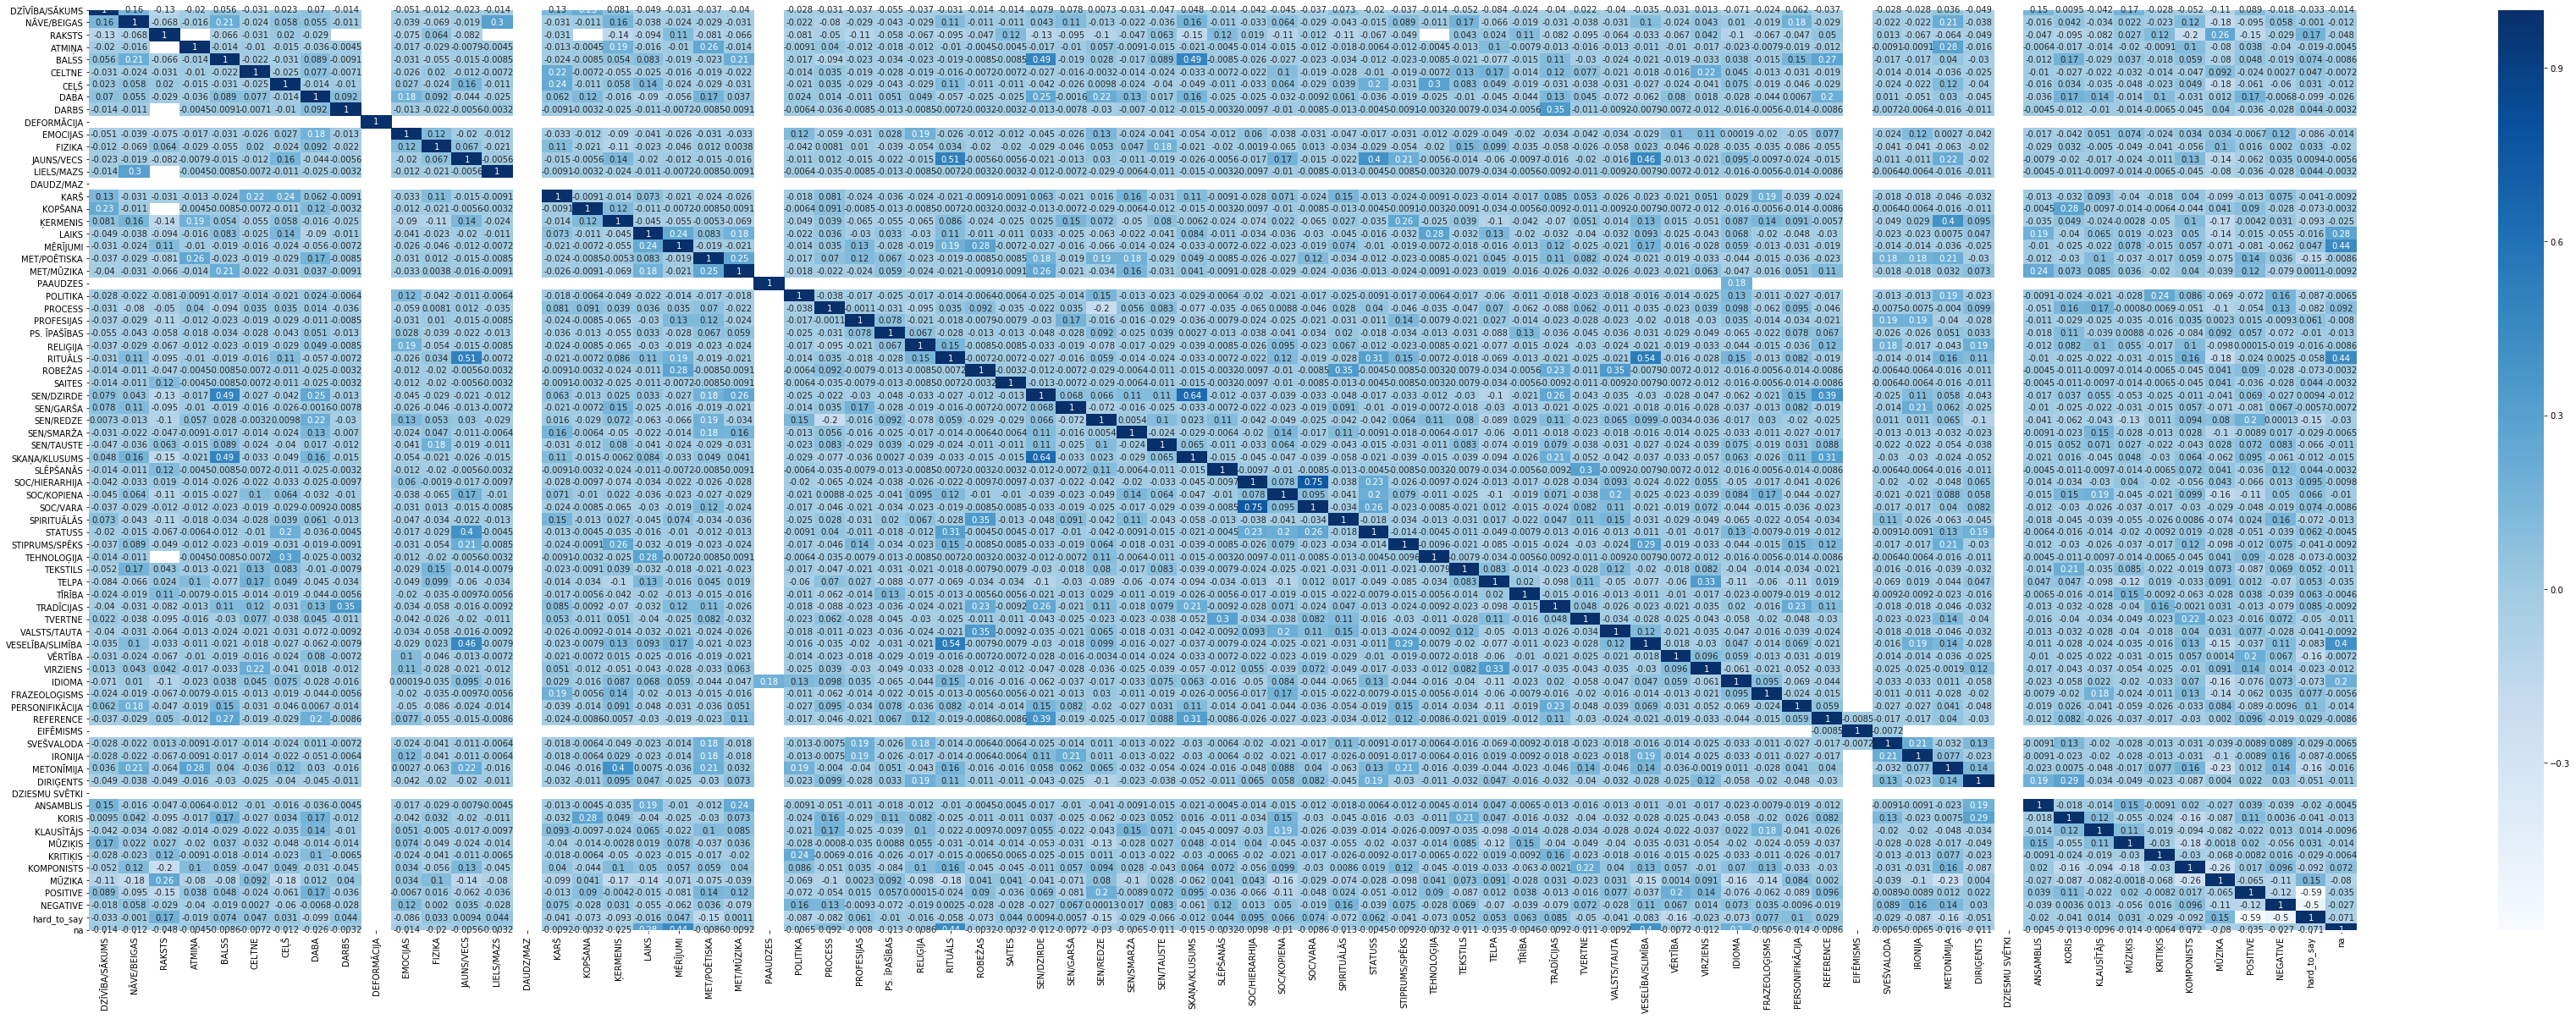

In [265]:
plt.figure(figsize=(60,20))
sns.heatmap(corr,cmap="Blues",annot = True)
plt.savefig('heatmap_pilot_1.png')

In [34]:
skaitiiklis = kategorijas.count(True)
sns.heatmap(sum,cmap="Blues",annot = True)

ValueError: No axis named True for object type <class 'pandas.core.frame.DataFrame'>

In [35]:
for kategorijas in ds:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-35-a4fbee2b91e2>, line 2)

In [37]:
ds['DABA'].value_counts()

0.0    263
1.0    125
Name: DABA, dtype: int64

In [53]:
ds['DABA'].sum()

125.0

In [54]:
263 + 125

388

In [73]:
count = ds[ds.columns].count().head(10)
print(count)

ANALĪZES VIENĪBAS_TĒLAINĀ VALODA_ALMANAHS "LATVJU MŪZIKA" 1968 –    3459
DZĪVĪBA/SĀKUMS                                                       331
NĀVE/BEIGAS                                                          321
RAKSTS                                                               187
ATMIŅA                                                               320
BALSS                                                                317
CELTNE                                                               322
CEĻŠ                                                                 370
DABA                                                                 388
DARBS                                                                352
dtype: int64


In [94]:
for key in kategorijas:
    print(kategorijas.sum())
    break

DZĪVĪBA/SĀKUMS     21.0
NĀVE/BEIGAS        13.0
RAKSTS             56.0
ATMIŅA              3.0
BALSS               9.0
                  ...  
MŪZIKA            213.0
POSITIVE           94.0
NEGATIVE           63.0
hard_to_say       200.0
na                  1.0
Length: 75, dtype: float64


In [257]:
a = [kategorijas.sum()]
print(a)

[DZĪVĪBA/SĀKUMS     21.0
NĀVE/BEIGAS        13.0
RAKSTS             56.0
ATMIŅA              3.0
BALSS               9.0
                  ...  
MŪZIKA            213.0
POSITIVE           94.0
NEGATIVE           63.0
hard_to_say       200.0
na                  1.0
Length: 75, dtype: float64]


AttributeError: 'list' object has no attribute 'valu_counts'

In [254]:
kat_summa = pd.DataFrame(a)
kat_summa.head()

,DZĪVĪBA/SĀKUMS,NĀVE/BEIGAS,RAKSTS,ATMIŅA,BALSS,CELTNE,CEĻŠ,DABA,DARBS,DEFORMĀCIJA,...,KORIS,KLAUSĪTĀJS,MŪZIĶIS,KRITIĶIS,KOMPONISTS,MŪZIKA,POSITIVE,NEGATIVE,hard_to_say,na
0,21.0,13.0,56.0,3.0,9.0,9.0,27.0,125.0,2.0,2.0,...,18.0,10.0,21.0,4.0,122.0,213.0,94.0,63.0,200.0,1.0


In [256]:
kat_summa.value_counts().sort_values()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

Text(0.5, 0, 'kategorijas')

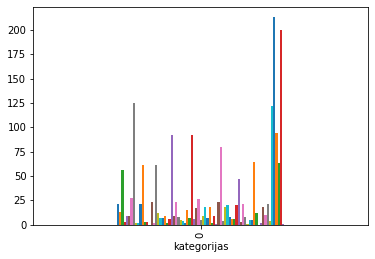

In [130]:
kat_plot = kat_summa.plot(kind='bar', legend=None)
kat_plot.set_xlabel('kategorijas')

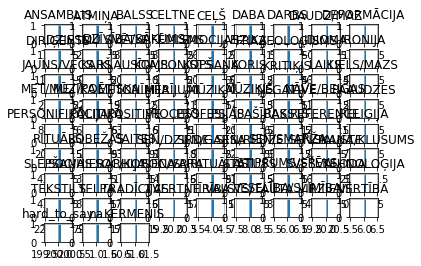

In [143]:
hist_plot = kat_summa.hist()
plt.show()

In [213]:
kat_summa.iloc[0]

DZĪVĪBA/SĀKUMS     21.0
NĀVE/BEIGAS        13.0
RAKSTS             56.0
ATMIŅA              3.0
BALSS               9.0
                  ...  
MŪZIKA            213.0
POSITIVE           94.0
NEGATIVE           63.0
hard_to_say       200.0
na                  1.0
Name: 0, Length: 75, dtype: float64

In [217]:
#y_vertibas = pd.DataFrame(kat_summa.iloc[0])

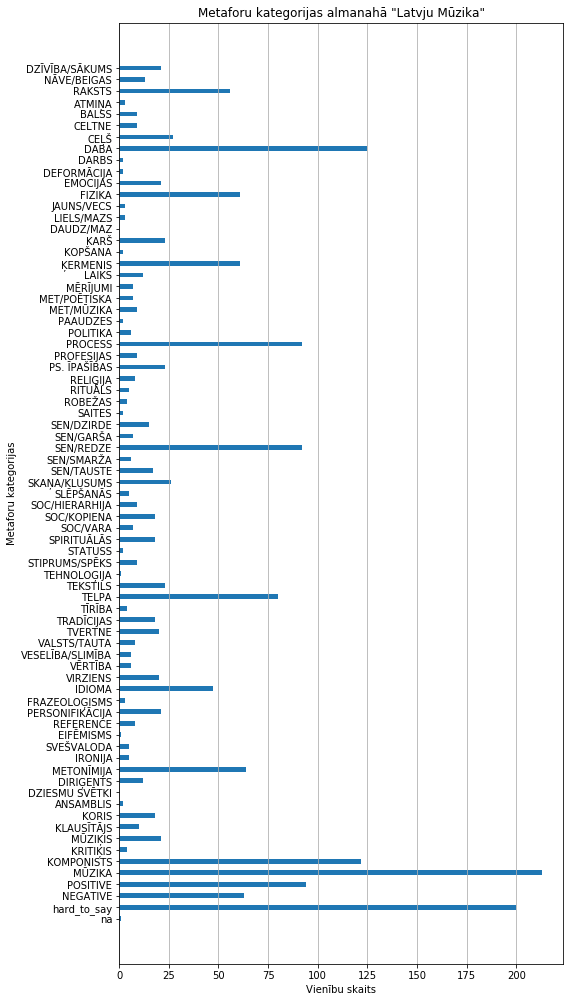

In [263]:
# DATI
labels = ['DZĪVĪBA/SĀKUMS', 'NĀVE/BEIGAS', 'RAKSTS', 'ATMIŅA', 'BALSS', 'CELTNE',
       'CEĻŠ', 'DABA', 'DARBS', 'DEFORMĀCIJA', 'EMOCIJAS', 'FIZIKA',
       'JAUNS/VECS', 'LIELS/MAZS', 'DAUDZ/MAZ', 'KARŠ', 'KOPŠANA', 'ĶERMENIS',
       'LAIKS', 'MĒRĪJUMI', 'MET/POĒTISKA', 'MET/MŪZIKA', 'PAAUDZES',
       'POLITIKA', 'PROCESS', 'PROFESIJAS', 'PS. ĪPAŠĪBAS', 'RELIĢIJA',
       'RITUĀLS', 'ROBEŽAS', 'SAITES', 'SEN/DZIRDE', 'SEN/GARŠA', 'SEN/REDZE',
       'SEN/SMARŽA', 'SEN/TAUSTE', 'SKAŅA/KLUSUMS', 'SLĒPŠANĀS',
       'SOC/HIERARHIJA', 'SOC/KOPIENA', 'SOC/VARA', 'SPIRITUĀLĀS', 'STATUSS',
       'STIPRUMS/SPĒKS', 'TEHNOLOĢIJA', 'TEKSTILS', 'TELPA', 'TĪRĪBA',
       'TRADĪCIJAS', 'TVERTNE', 'VALSTS/TAUTA', 'VESELĪBA/SLIMĪBA', 'VĒRTĪBA',
       'VIRZIENS', 'IDIOMA', 'FRAZEOLOĢISMS', 'PERSONIFIKĀCIJA', 'REFERENCE',
       'EIFĒMISMS', 'SVEŠVALODA', 'IRONIJA', 'METONĪMIJA', 'DIRIĢENTS',
       'DZIESMU SVĒTKI', 'ANSAMBLIS', 'KORIS', 'KLAUSĪTĀJS', 'MŪZIĶIS',
       'KRITIĶIS', 'KOMPONISTS', 'MŪZIKA', 'POSITIVE', 'NEGATIVE',
       'hard_to_say', 'na']
data = kat_summa.iloc[0]
y_pos = np.arange(len(data))

# GRAFIKA IZVEIDE
width = 0.4
fig, ax = plt.subplots(figsize=(8, 14)) 
ax.barh(y_pos, data, width, align='center')

# GRAFIKA UZLABOŠANA
#zemāk: divi nesekmīgi mēģinājumi sakārtot kategorijas augošā/dilstošā secībā
#kat_summa.sort_values('y_vertibas', inplace=True)
#ax = kat_summa.iloc[orders].plot.barh(stacked=True, cmap='tab10', figsize=(16, 10))
ax.set_yticks(y_pos) 
ax.set_yticklabels(labels) 
ax.xaxis.grid(True) 
ax.set_ylabel('Metaforu kategorijas'); 
ax.set_xlabel('Vienību skaits') 
ax.set_title('Metaforu kategorijas almanahā "Latvju Mūzika"')
ax.invert_yaxis()
fig.tight_layout(pad=1)
fig.savefig('Metaforu kategroijas_Latvju_Muzika.png', dpi=125)

TypeError: 'numpy.ndarray' object is not callable

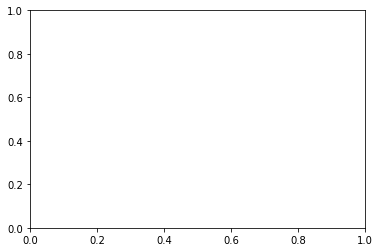

In [253]:
# vertical bar grafika
fig, axs = plt.subplots(1)

axs.bar(list(kat_summa.index), kat_summa.values()) 
axs.set_yscale('log')

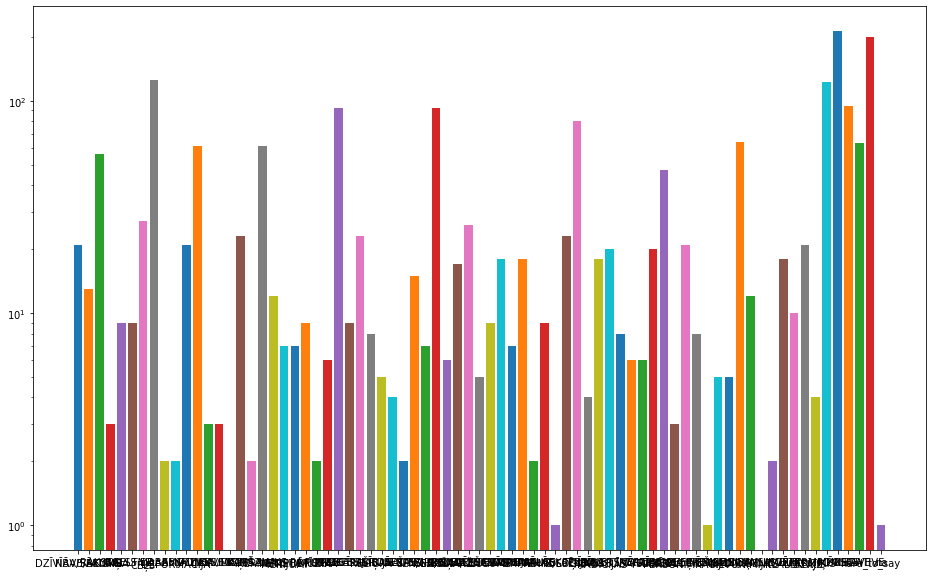

In [251]:
# vertical bar grafika 2
labels = ['DZĪVĪBA/SĀKUMS', 'NĀVE/BEIGAS', 'RAKSTS', 'ATMIŅA', 'BALSS', 'CELTNE',
       'CEĻŠ', 'DABA', 'DARBS', 'DEFORMĀCIJA', 'EMOCIJAS', 'FIZIKA',
       'JAUNS/VECS', 'LIELS/MAZS', 'DAUDZ/MAZ', 'KARŠ', 'KOPŠANA', 'ĶERMENIS',
       'LAIKS', 'MĒRĪJUMI', 'MET/POĒTISKA', 'MET/MŪZIKA', 'PAAUDZES',
       'POLITIKA', 'PROCESS', 'PROFESIJAS', 'PS. ĪPAŠĪBAS', 'RELIĢIJA',
       'RITUĀLS', 'ROBEŽAS', 'SAITES', 'SEN/DZIRDE', 'SEN/GARŠA', 'SEN/REDZE',
       'SEN/SMARŽA', 'SEN/TAUSTE', 'SKAŅA/KLUSUMS', 'SLĒPŠANĀS',
       'SOC/HIERARHIJA', 'SOC/KOPIENA', 'SOC/VARA', 'SPIRITUĀLĀS', 'STATUSS',
       'STIPRUMS/SPĒKS', 'TEHNOLOĢIJA', 'TEKSTILS', 'TELPA', 'TĪRĪBA',
       'TRADĪCIJAS', 'TVERTNE', 'VALSTS/TAUTA', 'VESELĪBA/SLIMĪBA', 'VĒRTĪBA',
       'VIRZIENS', 'IDIOMA', 'FRAZEOLOĢISMS', 'PERSONIFIKĀCIJA', 'REFERENCE',
       'EIFĒMISMS', 'SVEŠVALODA', 'IRONIJA', 'METONĪMIJA', 'DIRIĢENTS',
       'DZIESMU SVĒTKI', 'ANSAMBLIS', 'KORIS', 'KLAUSĪTĀJS', 'MŪZIĶIS',
       'KRITIĶIS', 'KOMPONISTS', 'MŪZIKA', 'POSITIVE', 'NEGATIVE',
       'hard_to_say', 'na']

fig, axs = plt.subplots(figsize=(16, 10)) 

for i,k in enumerate(kat_summa.keys()):
    axs.bar(i, kat_summa[k])

axs.set_xticks(range(len(labels)))
axs.set_xticklabels(labels)
ax.tick_params(axis='x', rotation=90)
axs.set_yscale('log')

In [247]:
kategorijas.sum()

DZĪVĪBA/SĀKUMS     21.0
NĀVE/BEIGAS        13.0
RAKSTS             56.0
ATMIŅA              3.0
BALSS               9.0
                  ...  
MŪZIKA            213.0
POSITIVE           94.0
NEGATIVE           63.0
hard_to_say       200.0
na                  1.0
Length: 75, dtype: float64

In [68]:
for column in ds:
    if True:
        ds.count()
        print(column)

ANALĪZES VIENĪBAS_TĒLAINĀ VALODA_ALMANAHS "LATVJU MŪZIKA" 1968 –
DZĪVĪBA/SĀKUMS
NĀVE/BEIGAS
RAKSTS
ATMIŅA
BALSS
CELTNE
CEĻŠ
DABA
DARBS
DEFORMĀCIJA
EMOCIJAS
FIZIKA
JAUNS/VECS
LIELS/MAZS
DAUDZ/MAZ
KARŠ
KOPŠANA
ĶERMENIS
LAIKS
MĒRĪJUMI
MET/POĒTISKA
MET/MŪZIKA
PAAUDZES
POLITIKA
PROCESS
PROFESIJAS
PS. ĪPAŠĪBAS
RELIĢIJA
RITUĀLS
ROBEŽAS
SAITES
SEN/DZIRDE
SEN/GARŠA
SEN/REDZE
SEN/SMARŽA
SEN/TAUSTE
SKAŅA/KLUSUMS
SLĒPŠANĀS
SOC/HIERARHIJA
SOC/KOPIENA
SOC/VARA
SPIRITUĀLĀS
STATUSS
STIPRUMS/SPĒKS
TEHNOLOĢIJA
TEKSTILS
TELPA
TĪRĪBA
TRADĪCIJAS
TVERTNE
VALSTS/TAUTA
VESELĪBA/SLIMĪBA
VĒRTĪBA
VIRZIENS
IDIOMA
FRAZEOLOĢISMS
PERSONIFIKĀCIJA
REFERENCE
EIFĒMISMS
SVEŠVALODA
IRONIJA
METONĪMIJA
DIRIĢENTS
DZIESMU SVĒTKI
ANSAMBLIS
KORIS
KLAUSĪTĀJS
MŪZIĶIS
KRITIĶIS
KOMPONISTS
MŪZIKA
POSITIVE
NEGATIVE
hard_to_say
na
GADS
LAIKRAKSTS
ŽANRS
PUBLIKĀCIJA
AUTORS
MĒRĶJOMA
AVOTJOMA
VĀRDŠĶIRA


In [74]:
sns.heatmap(kategorijas.count,cmap="Blues",annot = True)

ValueError: Must pass 2-d input

In [91]:
group = kategorijas.groupby("DABA")

In [92]:
print(group)

In [93]:
group.sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f8cf2d87a10>>